In [65]:
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import random
import itertools

In [28]:
def _random_subset(seq, m, rng):
    """Return m unique elements from seq.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.

    Note: rng is a random.Random or numpy.random.RandomState instance.
    """
    targets = set()
    while len(targets) < m:
        x = rng.choice(seq)
        targets.add(x)
    return targets

In [29]:
def barabasi_albert_graph(n, m, seed=None, initial_graph=None):
    """Returns a random graph using Barabási-Albert preferential attachment

    A graph of $n$ nodes is grown by attaching new nodes each with $m$
    edges that are preferentially attached to existing nodes with high degree.

    Parameters
    ----------
    n : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
    initial_graph : Graph or None (default)
        Initial network for Barabási-Albert algorithm.
        It should be a connected graph for most use cases.
        A copy of `initial_graph` is used.
        If None, starts from a star graph on (m+1) nodes.

    Returns
    -------
    G : Graph

    Raises
    ------
    NetworkXError
        If `m` does not satisfy ``1 <= m < n``, or
        the initial graph number of nodes m0 does not satisfy ``m <= m0 <= n``.

    References
    ----------
    .. [1] A. L. Barabási and R. Albert "Emergence of scaling in
       random networks", Science 286, pp 509-512, 1999.
    """

    if m < 1 or m >= n:
        raise nx.NetworkXError(
            f"Barabási-Albert network must have m >= 1 and m < n, m = {m}, n = {n}"
        )

    if initial_graph is None:
        # Default initial graph : star graph on (m + 1) nodes
        G = nx.star_graph(m)
    else:
        if len(initial_graph) < m or len(initial_graph) > n:
            raise nx.NetworkXError(
                f"Barabási-Albert initial graph needs between m={m} and n={n} nodes"
            )
        G = initial_graph.copy()

    if seed is None:
        seed = np.random.RandomState()

    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = [n for n, d in G.degree() for _ in range(d)]
    # Start adding the other n - m0 nodes.
    source = len(G)
    while source < n:
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes, m, seed)
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)

        source += 1
    return G

In [30]:
def count_cycles(G: nx.Graph, length: int) -> int:
    """Count the number of cycles of a given length in a graph.

    Parameters
    ----------
    G : nx.Graph
        The graph to count cycles in.
    length : int
        The length of the cycles to count.

    Returns
    -------
    int
        The number of cycles of length `length` in `G`.
    """
    return len([cycle for cycle in nx.simple_cycles(G) if len(cycle) == length])

(array([ 0.,  0.,  0.,  0.,  0.,  2.,  3.,  4., 88.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

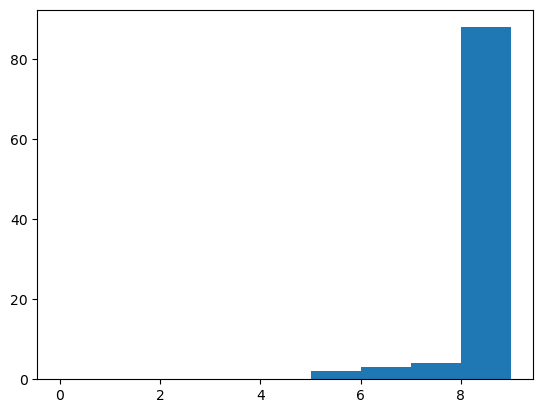

In [49]:
cycles = []
for i in range(1000):
    ba = barabasi_albert_graph(10, 3)
    cycles.append(count_cycles(ba, 3))

plt.hist(cycles, bins=range(10))

(False, None)


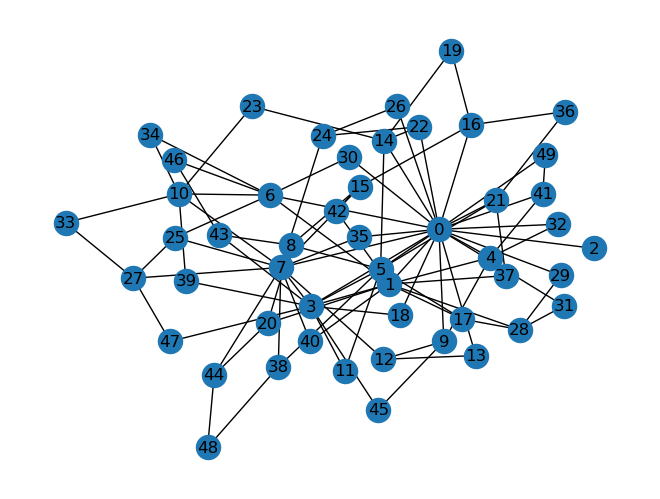

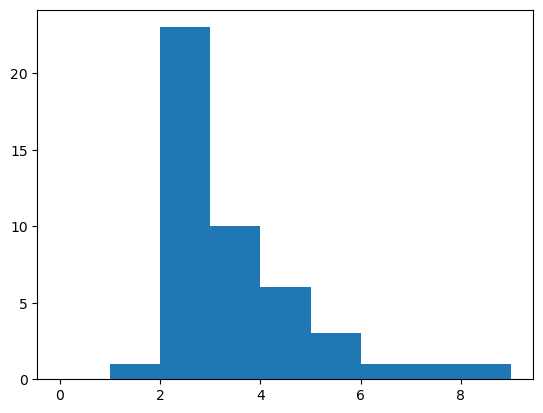

In [62]:
ba = barabasi_albert_graph(50, 2)
nx.draw(ba, with_labels=True)
degs = [d for n, d in ba.degree()]
plt.figure()
plt.hist(degs, bins=range(10))
print(nx.check_planarity(ba))

In [66]:
def generate_subgraphs(G: nx.Graph, n: int) -> nx.Graph:
    """Generate a subgraph of a graph by removing a random edge.

    Parameters
    ----------
    G : nx.Graph
        The graph to generate a subgraph of.
    n : int
        The number of edges to remove.

    Returns
    -------
    nx.Graph
        A subgraph of `G` with `n` edges removed.
    """
    nodes = list(G.nodes())
    nodes_subsets = itertools.chain.from_iterable(itertools.combinations(nodes, r) for r in range(len(nodes) + 1))
    
    result_graps = []
    for nodes_subset in nodes_subsets:
        g1 = G.subgraph(nodes_subset)
        g2 = G.subgraph([n for n in nodes if n not in nodes_subset])

        result_graps.append((g1, g2))

    return result_graps